# **Escuela Politecnica Nacional** 
# **Metodos Numericos**
# **Tarea 07**
## **Fecha:** 11/06/2025
## **Nombre:**  Joseph Jimenez

**1. Dados los puntos (0,1),(1,5),(2,3), determine el spline cúbico.**


**2. Dados los puntos (−1,1),(1,3), determine el spline cúbico sabiendo que $𝑓′(𝑥_0)=1,𝑓′(𝑥_𝑛)=2$.**

**3. Diríjase al pseudocódigo del spline cúbico con frontera natural provisto en clase, en base a ese pseudocódigo complete la siguiente función:**

In [15]:
import sympy as sym
from IPython.display import display


# ###################################################################
def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different  but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    alpha = [0] * (n + 1)  # coefficients for the tridiagonal system
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i]-h[i-1]*z[i-1])/l[i]]

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]

        print(j, a, b, c[j], d)
        S= a + b * (x - xs[j]) + c[j] * (x - xs[j])**2 + d * (x - xs[j])**3
        splines.append(S)
    splines.reverse()
    return splines

1 5 1.0 -4.5 1.5
0 1 5.5 0.0 -1.5


-1.5*x**3 + 5.5*x + 1

1.0*x + 1.5*(x - 1)**3 - 4.5*(x - 1)**2 + 4.0

______


-1.5*x**3 + 5.5*x + 1

1.5*x**3 - 9.0*x**2 + 14.5*x - 2.0

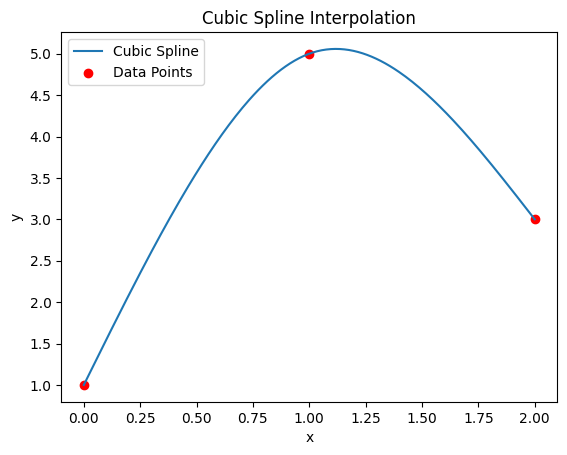

In [16]:
import numpy as np

xs = [0, 1, 2]
ys = [1, 5, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

import matplotlib.pyplot as plt

x_vals = np.linspace(min(xs), max(xs), 200)
y_vals = np.zeros_like(x_vals)

for i, S in enumerate(splines):
    # Each spline is valid in [xs[i], xs[i+1]]
    mask = (x_vals >= xs[i]) & (x_vals <= xs[i+1])
    y_vals[mask] = [float(S.subs('x', x)) for x in x_vals[mask]]

plt.plot(x_vals, y_vals, label='Cubic Spline')
plt.scatter(xs, ys, color='red', label='Data Points')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation')
plt.show()


**4. Usando la función anterior, encuentre el spline cúbico para:** 
    
    xs = [1, 2, 3] 
    
    ys = [2, 3, 5]

1 3 1.5 0.75 -0.25
0 2 0.75 0.0 0.25


0.75*x + 0.25*(x - 1)**3 + 1.25

1.5*x - 0.25*(x - 2)**3 + 0.75*(x - 2)**2

______


0.25*x**3 - 0.75*x**2 + 1.5*x + 1.0

-0.25*x**3 + 2.25*x**2 - 4.5*x + 5.0

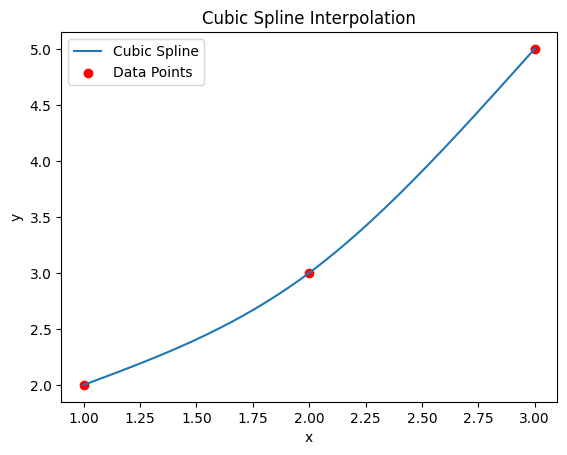

In [17]:
xs = [1, 2, 3]
ys = [2, 3, 5]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

import matplotlib.pyplot as plt

x_vals = np.linspace(min(xs), max(xs), 200)
y_vals = np.zeros_like(x_vals)

for i, S in enumerate(splines):
    # Each spline is valid in [xs[i], xs[i+1]]
    mask = (x_vals >= xs[i]) & (x_vals <= xs[i+1])
    y_vals[mask] = [float(S.subs('x', x)) for x in x_vals[mask]]

plt.plot(x_vals, y_vals, label='Cubic Spline')
plt.scatter(xs, ys, color='red', label='Data Points')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation')
plt.show()

**5. Usando la función anterior, encuentre el spline cúbico para:**
    
    xs = [0, 1, 2, 3] 

    ys = [-1 ,1, 5, 2]

2 5 1.0 -6.0 2.0
1 1 4.0 3.0 -3.0
0 -1 1.0 0.0 1.0


1.0*x**3 + 1.0*x - 1

4.0*x - 3.0*(x - 1)**3 + 3.0*(x - 1)**2 - 3.0

1.0*x + 2.0*(x - 2)**3 - 6.0*(x - 2)**2 + 3.0

______


1.0*x**3 + 1.0*x - 1

-3.0*x**3 + 12.0*x**2 - 11.0*x + 3.0

2.0*x**3 - 18.0*x**2 + 49.0*x - 37.0

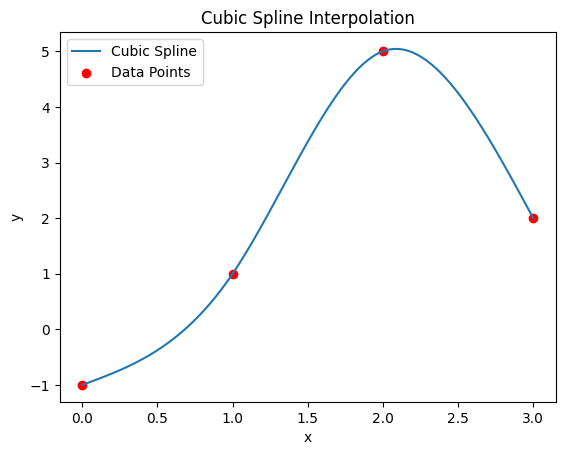

In [18]:
xs = [0, 1, 2, 3]
ys = [-1, 1, 5, 2]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

import matplotlib.pyplot as plt

x_vals = np.linspace(min(xs), max(xs), 200)
y_vals = np.zeros_like(x_vals)

for i, S in enumerate(splines):
    # Each spline is valid in [xs[i], xs[i+1]]
    mask = (x_vals >= xs[i]) & (x_vals <= xs[i+1])
    y_vals[mask] = [float(S.subs('x', x)) for x in x_vals[mask]]

plt.plot(x_vals, y_vals, label='Cubic Spline')
plt.scatter(xs, ys, color='red', label='Data Points')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Spline Interpolation')
plt.show()

**6. Use la función cubic_spline_clamped, provista en el enlace de Github, para graficar los datos de la siguiente tabla.**

![Gráfico de ejemplo](E6tabla.png)

In [19]:
import sympy as sym
from IPython.display import display


# ###################################################################
def cubic_spline_clamped(
    xs: list[float], ys: list[float], d0: float, dn: float
) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different  but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated
    - d0, dn: derivatives at the first and last points

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    n = len(points) - 1  # number of splines
    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    alpha = [0] * (n + 1)  # prealloc
    alpha[0] = 3 / h[0] * (ys[1] - ys[0]) - 3 * d0
    alpha[-1] = 3 * dn - 3 / h[n - 1] * (ys[n] - ys[n - 1])

    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [2 * h[0]]
    u = [0.5]
    z = [alpha[0] / l[0]]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]

    l.append(h[n - 1] * (2 - u[n - 1]))
    z.append((alpha[n] - h[n - 1] * z[n - 1]) / l[n])
    c = [0] * (n + 1)  # prealloc
    c[-1] = z[-1]

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        print(j, a, b, c[j], d)
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j]) ** 2 + d * (x - xs[j]) ** 3

        splines.append(S)
    splines.reverse()
    return splines

**- Curva 1**

In [20]:
xs = [1, 2, 5, 6, 7, 8, 10, 13, 17]
ys = [3, 3.7, 3.9, 4.2, 5.7, 6.6, 7.1, 6.7, 4.5]

splines = cubic_spline_clamped(xs=xs, ys=ys, d0=1, dn=-0.67)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

7 6.7 -0.3381314976116886 -0.07593425119415571 0.0057417813992694635
6 7.1 0.04846024164091059 -0.052929661890044014 -0.0025560654782346335
5 6.6 0.5472201929380908 -0.19645031375854607 0.023920108644750342
4 5.7 1.4091093003652708 -0.665438793668634 0.15632949330336265
3 4.2 1.0163426056008245 1.0582054884330803 -0.5745480940339047
2 3.9 -0.07447972276856785 0.03261683993631198 0.3418628828322561
1 3.7 0.4468099653460711 -0.20638006930785827 0.02655521213824114
0 3 1.0 -0.3468099653460706 0.046809965346070785


1.0*x + 0.0468099653460708*(x - 1)**3 - 0.346809965346071*(x - 1)**2 + 2.0

0.446809965346071*x + 0.0265552121382411*(x - 2)**3 - 0.206380069307858*(x - 2)**2 + 2.80638006930786

-0.0744797227685678*x + 0.341862882832256*(x - 5)**3 + 0.032616839936312*(x - 5)**2 + 4.27239861384284

1.01634260560082*x - 0.574548094033905*(x - 6)**3 + 1.05820548843308*(x - 6)**2 - 1.89805563360495

1.40910930036527*x + 0.156329493303363*(x - 7)**3 - 0.665438793668634*(x - 7)**2 - 4.1637651025569

0.547220192938091*x + 0.0239201086447503*(x - 8)**3 - 0.196450313758546*(x - 8)**2 + 2.22223845649527

0.0484602416409106*x - 0.00255606547823463*(x - 10)**3 - 0.052929661890044*(x - 10)**2 + 6.61539758359089

-0.338131497611689*x + 0.00574178139926946*(x - 13)**3 - 0.0759342511941557*(x - 13)**2 + 11.095709468952

______


0.0468099653460708*x**3 - 0.487239861384283*x**2 + 1.83404982673035*x + 1.60638006930786

0.0265552121382411*x**3 - 0.365711342137305*x**2 + 1.5909927882364*x + 1.7684180949705

0.341862882832256*x**3 - 5.09532640254753*x**2 + 25.2390680902875*x - 37.6450407417814

-0.574548094033905*x**3 + 11.4000711810434*x**2 - 73.7333174112578*x + 160.299730261309

0.156329493303363*x**3 - 3.94835815303925*x**2 + 33.7056879273205*x - 90.3912821953733

0.0239201086447503*x**3 - 0.770532921232554*x**2 + 8.28308607286689*x - 22.5976772501638

-0.00255606547823463*x**3 + 0.023752302456995*x**2 + 0.340233835971401*x + 3.87849687282113

0.00574178139926946*x**3 - 0.299863725765665*x**2 + 4.54724220286598*x - 14.3518727170554

**- Curva 2**

In [21]:
xs = [17,20,23,24,25,27,27.7]
ys = [4.5,7.0,6.1,5.6,5.8,5.2,4.1]

splines = cubic_spline_clamped(xs=xs, ys=ys, d0=3, dn=-4.0)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

5 5.2 -0.4011781849199465 0.1258152222202451 -2.568002126658778
4 5.8 0.1539868142803838 -0.4033977218204103 0.08820215734010924
3 5.6 -0.11137135038117751 0.6687558864819717 -0.35738453610079396
2 6.1 -0.6085014127556733 -0.17162582410747595 0.2801272368631492
1 7.0 -0.19787464681108174 0.03475023545927881 -0.022930673285194974
0 4.5 3.0 -1.1007084510629728 0.12616207628025017


3.0*x + 0.12616207628025*(x - 17)**3 - 1.10070845106297*(x - 17)**2 - 46.5

-0.197874646811082*x - 0.022930673285195*(x - 20)**3 + 0.0347502354592788*(x - 20)**2 + 10.9574929362216

-0.608501412755673*x + 0.280127236863149*(x - 23)**3 - 0.171625824107476*(x - 23)**2 + 20.0955324933805

-0.111371350381178*x - 0.357384536100794*(x - 24)**3 + 0.668755886481972*(x - 24)**2 + 8.27291240914826

0.153986814280384*x + 0.0882021573401092*(x - 25)**3 - 0.40339772182041*(x - 25)**2 + 1.9503296429904

-0.401178184919947*x - 2.56800212665878*(x - 27)**3 + 0.125815222220245*(x - 27)**2 + 16.0318109928386

______


0.12616207628025*x**3 - 7.53497434135573*x**2 + 149.806607471118*x - 984.439023122068

-0.022930673285195*x**3 + 1.41059063257098*x**2 - 29.1046920074162*x + 208.302973401493

0.280127236863149*x**3 - 19.5004051676648*x**2 + 451.848211398006*x - 3479.00261937341

-0.357384536100794*x**3 + 26.4004424857391*x**2 - 649.772132283688*x + 5333.96013008014

0.0882021573401092*x**3 - 7.0185595223286*x**2 + 185.702917918006*x - 1628.33195493397

-2.56800212665878*x**3 + 208.133987481581*x**2 - 5623.41585118756*x + 50653.7369670161

**- Curva 3**

In [22]:
xs = [27.7,28,29,30]
ys = [4.1,4.3,4.1,3.0]

splines = cubic_spline_clamped(xs=xs, ys=ys, d0=0.33, dn=-1.5)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

2 4.1 -0.7653465346534649 -0.26930693069306927 -0.06534653465346556
1 4.3 0.6613861386138599 -1.1574257425742556 0.2960396039603954
0 4.1 0.3299999999999999 2.2620462046204524 -3.799413274660778


0.33*x - 3.79941327466078*(x - 27.7)**3 + 2.26204620462045*(x - 27.7)**2 - 5.041

0.66138613861386*x + 0.296039603960395*(x - 28)**3 - 1.15742574257426*(x - 28)**2 - 14.2188118811881

-0.765346534653465*x - 0.0653465346534656*(x - 29)**3 - 0.269306930693069*(x - 29)**2 + 26.2950495049505

______


-3.79941327466078*x**3 + 317.993289328931*x**2 - 8870.74279427938*x + 82483.079611294

0.296039603960395*x**3 - 26.0247524752475*x**2 + 761.762376237622*x - 7420.30198019801

-0.0653465346534656*x**3 + 5.41584158415843*x**2 - 150.014851485149*x + 1393.54455445545